In [1]:
# hide any warning messages issued by python
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing data file
import pandas as pd
wsb_df = pd.read_csv('wsb.csv')
wsb_df.head(10)

,Month,Sale Quantity,Promotion Expenses,Competition Promotion
0,1,3002666,105,1
1,2,4401553,145,0
2,3,3205279,118,1
3,4,4245349,130,0
4,5,3001940,98,1
5,6,4377766,156,0
6,7,2798343,98,1
7,8,4303668,144,0
8,9,2958185,112,1
9,10,3623386,120,0


In [3]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

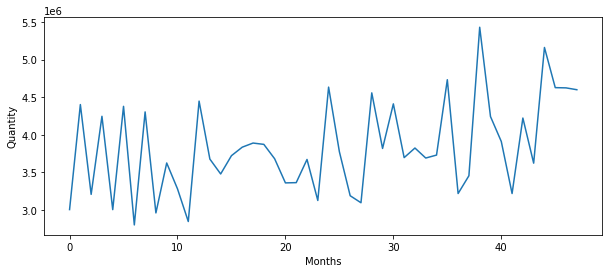

In [5]:
# plotting time series data
plt.figure(figsize=(10,4))
plt.xlabel("Months")
plt.ylabel("Quantity")
plt.plot(wsb_df['Sale Quantity']);

In [6]:
#gathering information of datafile
wsb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Month                  48 non-null     int64
 1   Sale Quantity          48 non-null     int64
 2   Promotion Expenses     48 non-null     int64
 3   Competition Promotion  48 non-null     int64
dtypes: int64(4)
memory usage: 1.6 KB


In [7]:
# finding rolling mean
wsb_df['mavg_12']=wsb_df['Sale Quantity'].rolling(window=12).mean().shift(1)

In [8]:
#finding moving average of 12 months
pd.set_option('display.float_format', lambda x: '%.2f' % x)
wsb_df[['Sale Quantity', 'mavg_12']][0:]

,Sale Quantity,mavg_12
0,3002666,nan
1,4401553,nan
2,3205279,nan
3,4245349,nan
4,3001940,nan
5,4377766,nan
6,2798343,nan
7,4303668,nan
8,2958185,nan
9,3623386,nan


No handles with labels found to put in legend.


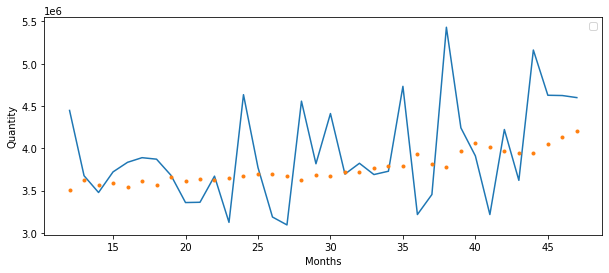

In [9]:
# plotting moving average on graph ( dotted in gray) and compare with original data
plt.figure(figsize=(10,4))
plt.xlabel("Months")
plt.ylabel("Quantity")
plt.plot(wsb_df['Sale Quantity'][12:]);
plt.plot(wsb_df['mavg_12'][12:],'.');
plt.legend();

In [10]:
# define function to findout mean absolute percentage error
import numpy as np
def get_mape(actual, predicted): 
 y_true, y_pred = np.array(actual), np.array(predicted) 
 return np.round( np.mean(np.abs((actual - predicted) / actual)) * 100, 2 )


In [12]:
# use function to findout mean absolute percentage error
get_mape(wsb_df['Sale Quantity'][36:].values,
wsb_df['mavg_12'][36:].values)

14.04

In [13]:
# compute mean square error
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(wsb_df['Sale Quantity'][36:].values,
wsb_df['mavg_12'][36:].values))

734725.8359239782

In [14]:
# exponential weighted moving average
wsb_df['ewm']=wsb_df['Sale Quantity'].ewm(alpha=0.2).mean()

In [15]:
# describing display format of time series data
pd.options.display.float_format = '{:.2f}'.format

In [16]:
# displaying original data ,moving average and exponential moving 
# average from 36 index row onwards
wsb_df[36:]

,Month,Sale Quantity,Promotion Expenses,Competition Promotion,mavg_12,ewm
36,37,3216483,121,1,3928410.33,3828234.64
37,38,3453239,128,0,3810280.00,3753219.93
38,39,5431651,170,0,3783643.33,4088961.93
39,40,4241851,160,0,3970688.42,4119543.81
40,41,3909887,151,1,4066369.08,4077607.99
41,42,3216438,120,1,4012412.75,3905359.34
42,43,4222005,152,0,3962369.58,3968692.78
43,44,3621034,125,0,3946629.42,3899157.24
44,45,5162201,170,0,3940489.50,4151776.99
45,46,4627177,160,0,4052117.17,4246860.31


In [18]:
# find out mean absolute percentage error
get_mape(wsb_df[['Sale Quantity']][36:].values,
wsb_df[['ewm']][36:].values)

11.15

No handles with labels found to put in legend.


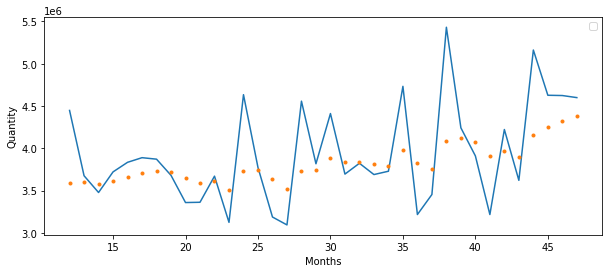

In [19]:
# plotting exponential weighted moving average (gray .. ) along with original data
plt.figure(figsize=(10,4))
plt.xlabel("Months")
plt.ylabel("Quantity")
plt.plot(wsb_df['Sale Quantity'][12:]);
plt.plot(wsb_df['ewm'][12:],'.');
plt.legend();

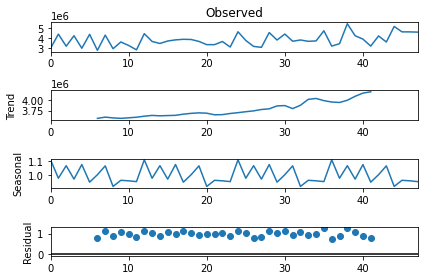

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose
ts_decompse = seasonal_decompose (np.array(wsb_df['Sale Quantity']),
model ='multiplicative',
freq=12)
# plotting the decomposed time series components
ts_plot = ts_decompse.plot()

In [22]:
wsb_df['seasonal'] =  ts_decompse.seasonal
wsb_df['trend'] = ts_decompse.trend

In [23]:
# importing vimana dataset
vimana_df = pd.read_csv('vimana.csv')
vimana_df.head(5)


,Month,demand
0,1,457
1,2,439
2,3,404
3,4,392
4,5,403


In [24]:
vimana_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Month   37 non-null     int64
 1   demand  37 non-null     int64
dtypes: int64(2)
memory usage: 720.0 bytes


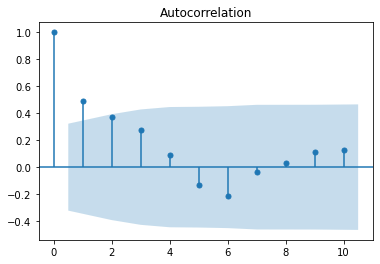

In [25]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
# show autocorrelation upto lag 10 # acf= auto correlation function,pacf= partial acf
acf_plot = plot_acf(vimana_df.demand,lags=10)

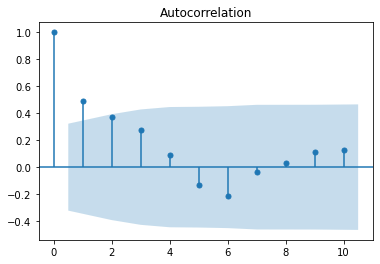

In [26]:
# ACF will be used for moving average and pacf will be used for auto regression model
pacf_plot = plot_acf(vimana_df.demand,lags=10)

In [27]:
from statsmodels.tsa.arima_model import ARIMA


In [29]:
arima = ARIMA(vimana_df.demand[0:30].astype(np.float64).to_numpy(),order=(1,0,0))
ar_model = arima.fit()

In [30]:
ar_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: ARMA
==================================================================
Model:              ARMA             BIC:                 375.7336
Dependent Variable: y                Log-Likelihood:      -182.77 
Date:               2021-12-25 21:01 Scale:               1.0000  
No. Observations:   30               Method:              css-mle 
Df Model:           2                Sample:              0       
Df Residuals:       28                                    0       
Converged:          1.0000           S.D. of innovations: 106.593 
No. Iterations:     14.0000          HQIC:                372.875 
AIC:                371.5300                                      
-------------------------------------------------------------------
             Coef.    Std.Err.     t     P>|t|    [0.025    0.975] 
-------------------------------------------------------------------
const       513.4440   35.9146  14.2962  0.0000  443.0527  583.8354
ar.L1.y       0.4726    0.1576   2.9995  0.0027    0.1638    0.7814
---------------------------------------------------------------------------
               Real           Imaginary          Modulus          Frequency
---------------------------------------------------------------------------
AR.1          2.1161             0.0000           2.1161             0.0000
==================================================================

"""

In [31]:
forecast_31_37 = ar_model.predict(30,36)

In [32]:
forecast_31_37

array([480.15382643, 497.71185947, 506.00937696, 509.93059047,
       511.78366465, 512.65938435, 513.07322909])

In [33]:
get_mape(vimana_df.demand[30:],
forecast_31_37)

19.12

In [34]:
arima = ARIMA(vimana_df.demand[0:30].astype(np.float64).to_numpy(),
order = (0,0,1))
ma_model = arima.fit()
ma_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: ARMA
==================================================================
Model:              ARMA             BIC:                 378.7982
Dependent Variable: y                Log-Likelihood:      -184.30 
Date:               2021-12-25 21:10 Scale:               1.0000  
No. Observations:   30               Method:              css-mle 
Df Model:           2                Sample:              0       
Df Residuals:       28                                    0       
Converged:          1.0000           S.D. of innovations: 112.453 
No. Iterations:     18.0000          HQIC:                375.939 
AIC:                374.5946                                      
-------------------------------------------------------------------
             Coef.    Std.Err.     t     P>|t|    [0.025    0.975] 
-------------------------------------------------------------------
const       516.5443   26.8307  19.2520  0.0000  463.9571  569.1314
ma.L1.y       0.3173    0.1421   2.2327  0.0256    0.0388    0.5958
--------------------------------------------------------------------------
                 Real          Imaginary         Modulus         Frequency
--------------------------------------------------------------------------
MA.1           -3.1518            0.0000          3.1518            0.5000
==================================================================

"""

In [35]:
forecast_31_37 = ma_model.predict(30,36)
get_mape(vimana_df.demand[30:],
forecast_31_37)

17.8

In [36]:
arima = ARIMA(vimana_df.demand[0:30].astype(np.float64).to_numpy(),
order = (1,0,1))
arma_model = arima.fit()
arma_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: ARMA
==================================================================
Model:              ARMA             BIC:                 377.2964
Dependent Variable: y                Log-Likelihood:      -181.85 
Date:               2021-12-25 21:14 Scale:               1.0000  
No. Observations:   30               Method:              css-mle 
Df Model:           3                Sample:              0       
Df Residuals:       27                                    0       
Converged:          1.0000           S.D. of innovations: 103.223 
No. Iterations:     21.0000          HQIC:                373.485 
AIC:                371.6916                                      
-------------------------------------------------------------------
             Coef.    Std.Err.     t     P>|t|    [0.025    0.975] 
-------------------------------------------------------------------
const       508.3995   45.3278  11.2161  0.0000  419.5585  597.2404
ar.L1.y       0.7421    0.1681   4.4158  0.0000    0.4127    1.0715
ma.L1.y      -0.3394    0.2070  -1.6401  0.1010   -0.7451    0.0662
---------------------------------------------------------------------------
               Real           Imaginary          Modulus          Frequency
---------------------------------------------------------------------------
AR.1          1.3475             0.0000           1.3475             0.0000
MA.1          2.9461             0.0000           2.9461             0.0000
==================================================================

"""

In [37]:
forecast_31_37 = arma_model.predict(30,36)
get_mape(vimana_df.demand[30:],
forecast_31_37)

20.27

In [38]:
store_df = pd.read_excel('store.xls')

In [39]:
store_df.head(5)

,Date,demand
0,2014-10-01,15
1,2014-10-02,7
2,2014-10-03,8
3,2014-10-04,10
4,2014-10-05,13


In [40]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    115 non-null    datetime64[ns]
 1   demand  115 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.9 KB


In [41]:
store_df.set_index(pd.to_datetime(store_df.Date),inplace= True)
store_df.drop('Date',axis=1,inplace = True)
store_df[-5:]

,demand
Date,
2015-01-19,18
2015-01-20,22
2015-01-21,22
2015-01-22,21
2015-01-23,17


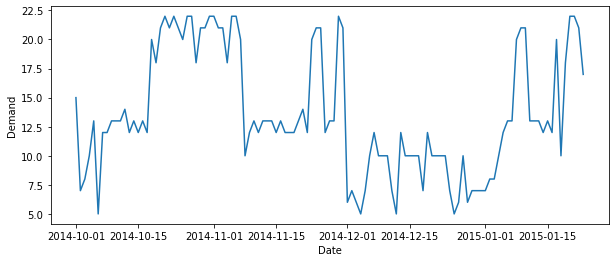

In [42]:
plt.figure(figsize=(10,4))
plt.xlabel("Date")
plt.ylabel("Demand")
plt.plot(store_df.demand);

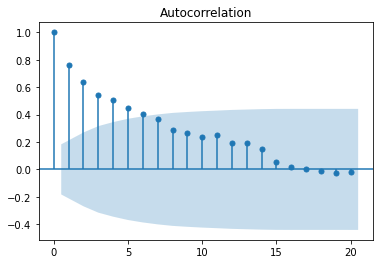

In [43]:
acf_plot = plot_acf(store_df.demand,lags=20)

In [44]:
from statsmodels.tsa.stattools import adfuller


In [46]:
def adfuller_test( ts ): 
 adfuller_result = adfuller( ts, autolag=None ) 
 adfuller_out = pd.Series(adfuller_result[0:4], 
index=['Test Statistic', 
'p-value', 
'Lags Used', 
'Number of Observations Used']) 
 print( adfuller_out )


In [48]:
adfuller_test(store_df.demand)

Test Statistic                 -1.65
p-value                         0.46
Lags Used                      13.00
Number of Observations Used   101.00
dtype: float64


In [49]:
store_df['demand_diff'] =  store_df.demand - store_df.demand.shift(1)

In [50]:
store_df.head(5)

,demand,demand_diff
Date,,
2014-10-01,15,nan
2014-10-02,7,-8.00
2014-10-03,8,1.00
2014-10-04,10,2.00
2014-10-05,13,3.00


In [51]:
store_diff_df = store_df.dropna()

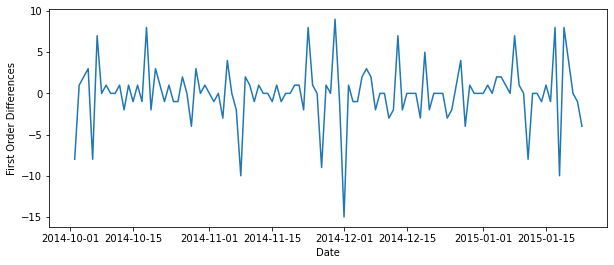

In [52]:
plt.figure(figsize=(10,4))
plt.xlabel("Date")
plt.ylabel("First Order Differences")
plt.plot(store_diff_df.demand_diff);

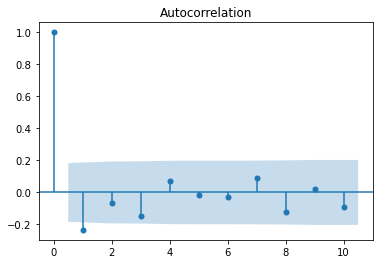

In [54]:
pacf_plot = plot_acf(store_df.demand_diff.dropna(),lags=10)

In [55]:
store_train = store_df[0:100]
store_test = store_df[100:]
arima = ARIMA ( store_train.demand.astype(np.float64).to_numpy(),
order = (1,1,1))
arima_model =  arima.fit()
arima_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: ARIMA
==================================================================
Model:              ARIMA            BIC:                 532.1510
Dependent Variable: D.y              Log-Likelihood:      -256.89 
Date:               2021-12-25 21:45 Scale:               1.0000  
No. Observations:   99               Method:              css-mle 
Df Model:           3                Sample:              1       
Df Residuals:       96                                    0       
Converged:          1.0000           S.D. of innovations: 3.237   
No. Iterations:     10.0000          HQIC:                525.971 
AIC:                521.7706                                      
-------------------------------------------------------------------
                Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
-------------------------------------------------------------------
const           0.0357    0.1599   0.2232  0.8234  -0.2776   0.3490
ar.L1.D.y       0.4058    0.2294   1.7695  0.0768  -0.0437   0.8554
ma.L1.D.y      -0.7155    0.1790  -3.9972  0.0001  -1.0663  -0.3647
---------------------------------------------------------------------------
               Real           Imaginary          Modulus          Frequency
---------------------------------------------------------------------------
AR.1          2.4641             0.0000           2.4641             0.0000
MA.1          1.3977             0.0000           1.3977             0.0000
==================================================================

"""

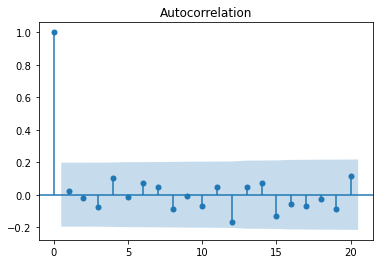

In [56]:
acf_plot = plot_acf(arima_model.resid,
lags=20)

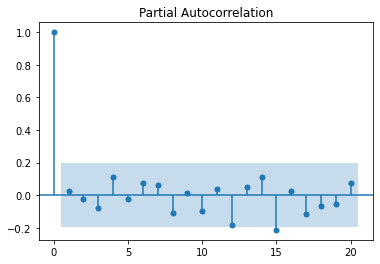

In [57]:
pacf_plot = plot_pacf(arima_model.resid,
lags=20)

In [58]:
store_predict, stderr,  ci = arima_model.forecast(steps = 15)

In [59]:
get_mape(store_df.demand[100:],
store_predict)

24.17